In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('train_data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train_data.csv')
df.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


# DATA CLEANING

# Renaming the columns to avoid complications 

In [4]:
df = df.rename(columns = {'Has a car':'Car_Owner', 'Has a property':'Propert_Owner', 'Children count':'CHILDREN', 'Income':'Annual_income', 'Employment status':'Type_Income', 'Education level':'EDUCATION', 'Marital status':'Marital_status', 'Dwelling':'Housing_type', 'Age':'Birthday_count', 'Employment length':'Employed_days', 'Has a mobile phone':'Mobile_phone', 'Has a work phone':'Work_Phone', 'Has a phone':'Phone', 'Has an email':'EMAIL_ID', 'Job title':'Type_Occupation', 'Family member count':'Family_Members', 'Account age':'Account_age', 'Is high risk':'High_risk'})

In [5]:
df.head()

,ID,Gender,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Account_age,High_risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


In [6]:
df.isna().sum()

ID                    0
Gender                0
Car_Owner             0
Propert_Owner         0
CHILDREN              0
Annual_income         0
Type_Income           0
EDUCATION             0
Marital_status        0
Housing_type          0
Birthday_count        0
Employed_days         0
Mobile_phone          0
Work_Phone            0
Phone                 0
EMAIL_ID              0
Type_Occupation    9027
Family_Members        0
Account_age           0
High_risk             0
dtype: int64

Dropping Type of Occupation, due to high number of Null Values


In [7]:
df.drop(['Type_Occupation'],axis=1,inplace = True)


In [8]:
df.isna().sum()

ID                0
Gender            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Housing_type      0
Birthday_count    0
Employed_days     0
Mobile_phone      0
Work_Phone        0
Phone             0
EMAIL_ID          0
Family_Members    0
Account_age       0
High_risk         0
dtype: int64

In [9]:
df.head()

,ID,Gender,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,Account_age,High_risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,1.0,-41.0,0


In [10]:
df.describe()

,ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,Account_age,High_risk
count,2.916500e+04,29165.000000,2.916500e+04,29165.000000,29165.000000,29165.0,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000
mean,5.078232e+06,0.430790,1.868904e+05,-15979.477490,59257.761255,1.0,0.224310,0.294977,0.090279,2.197531,-26.137734,0.017110
std,4.182400e+04,0.741882,1.014096e+05,4202.997485,137655.883458,0.0,0.417134,0.456040,0.286587,0.912189,16.486702,0.129682
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042047e+06,0.000000,1.215000e+05,-19444.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074666e+06,0.000000,1.575000e+05,-15565.000000,-1557.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.114629e+06,1.000000,2.250000e+05,-12475.000000,-412.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150485e+06,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


# Exploratory Data Analysis (EDA):

Conduct a comprehensive EDA on the dataset, unveiling valuable insights through data
visualization, summary statistics, and pattern identification. Perform Univariate and Bivariate
analysis, listing down business findings from EDA.


In [11]:
df.groupby('EDUCATION').Annual_income.describe()

,count,mean,std,min,25%,50%,75%,max
EDUCATION,,,,,,,,
Academic degree,25.0,249300.000000,92751.684621,135000.0,135000.0,270000.0,337500.0,450000.0
Higher education,7910.0,223674.366561,126588.456372,27000.0,135000.0,202500.0,270000.0,1575000.0
Incomplete higher,1129.0,199929.539415,94146.286585,67500.0,135000.0,180000.0,247500.0,810000.0
Lower secondary,298.0,141629.194631,61455.197225,30150.0,90000.0,135000.0,180000.0,360000.0
Secondary / secondary special,19803.0,172056.526738,85835.255392,29250.0,112500.0,157500.0,211500.0,1125000.0


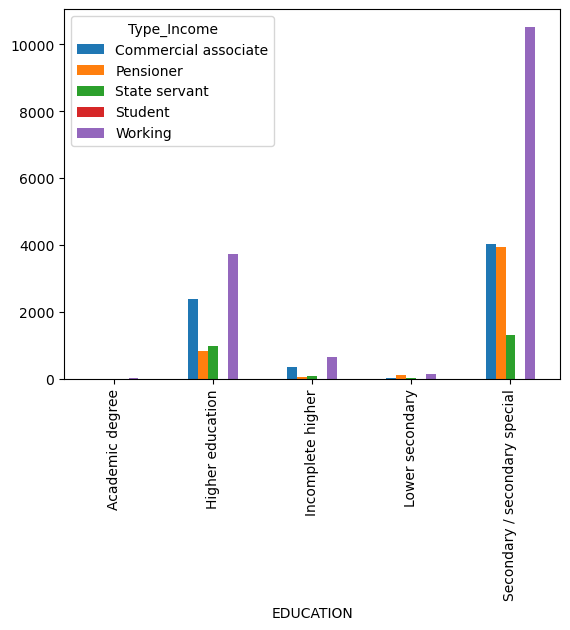

In [12]:
pd.crosstab(df.EDUCATION,df.Type_Income).plot(kind='bar')
plt.show()

In [13]:
df.groupby("Housing_type").Annual_income.describe()

,count,mean,std,min,25%,50%,75%,max
Housing_type,,,,,,,,
Co-op apartment,127.0,211677.165354,155276.552155,67500.0,135000.0,202500.0,225000.0,900000.0
House / apartment,26059.0,186849.370755,100744.177053,27000.0,121500.0,157500.0,225000.0,1575000.0
Municipal apartment,912.0,179905.440789,119065.159273,36000.0,112500.0,157500.0,225000.0,1350000.0
Office apartment,208.0,219872.596154,132393.525332,33300.0,135000.0,186750.0,270000.0,810000.0
Rented apartment,453.0,207195.735099,104660.590039,36000.0,135000.0,180000.0,292500.0,1125000.0
With parents,1406.0,178520.914651,85542.184706,47250.0,126000.0,157500.0,225000.0,716323.5


In [14]:
df.groupby("CHILDREN").Annual_income.describe()

,count,mean,std,min,25%,50%,75%,max
CHILDREN,,,,,,,,
0,20143.0,183588.548826,97004.946906,27000.0,117000.0,157500.0,225000.0,1350000.0
1,6003.0,195887.564468,113381.742762,33300.0,135000.0,171000.0,225000.0,1575000.0
2,2624.0,191794.321646,103496.024492,45000.0,130500.0,173250.0,225000.0,1125000.0
3,323.0,189470.897833,113719.100457,37800.0,126000.0,157500.0,207000.0,675000.0
4,52.0,167365.384615,54723.378825,67500.0,112500.0,157500.0,202500.0,292500.0
5,15.0,178200.000000,28854.190089,112500.0,157500.0,189000.0,202500.0,211500.0
7,2.0,157500.000000,0.000000,157500.0,157500.0,157500.0,157500.0,157500.0
14,2.0,225000.000000,0.000000,225000.0,225000.0,225000.0,225000.0,225000.0
19,1.0,112500.000000,NaN,112500.0,112500.0,112500.0,112500.0,112500.0


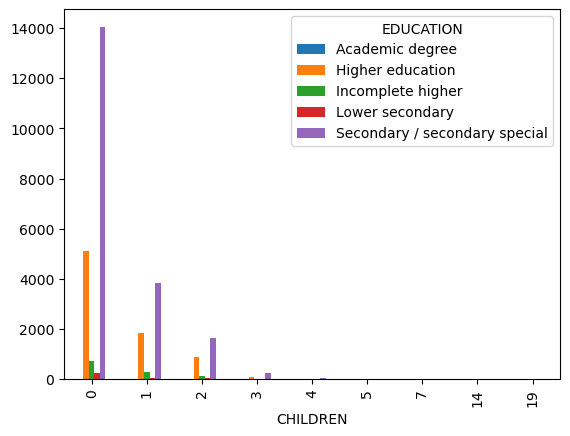

In [15]:
pd.crosstab(df.CHILDREN,df.EDUCATION).plot(kind='bar')
plt.show()

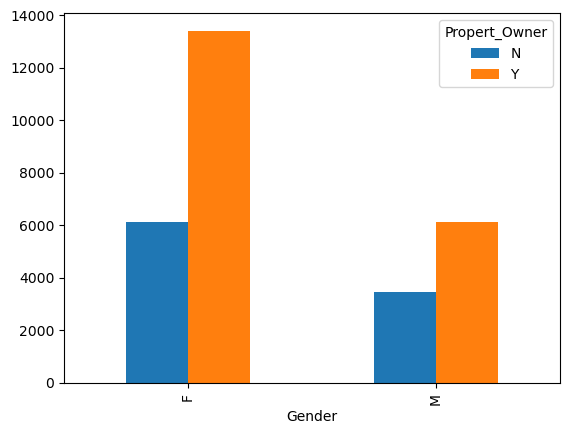

In [16]:
pd.crosstab(df.Gender,df.Propert_Owner).plot(kind='bar')
plt.show()

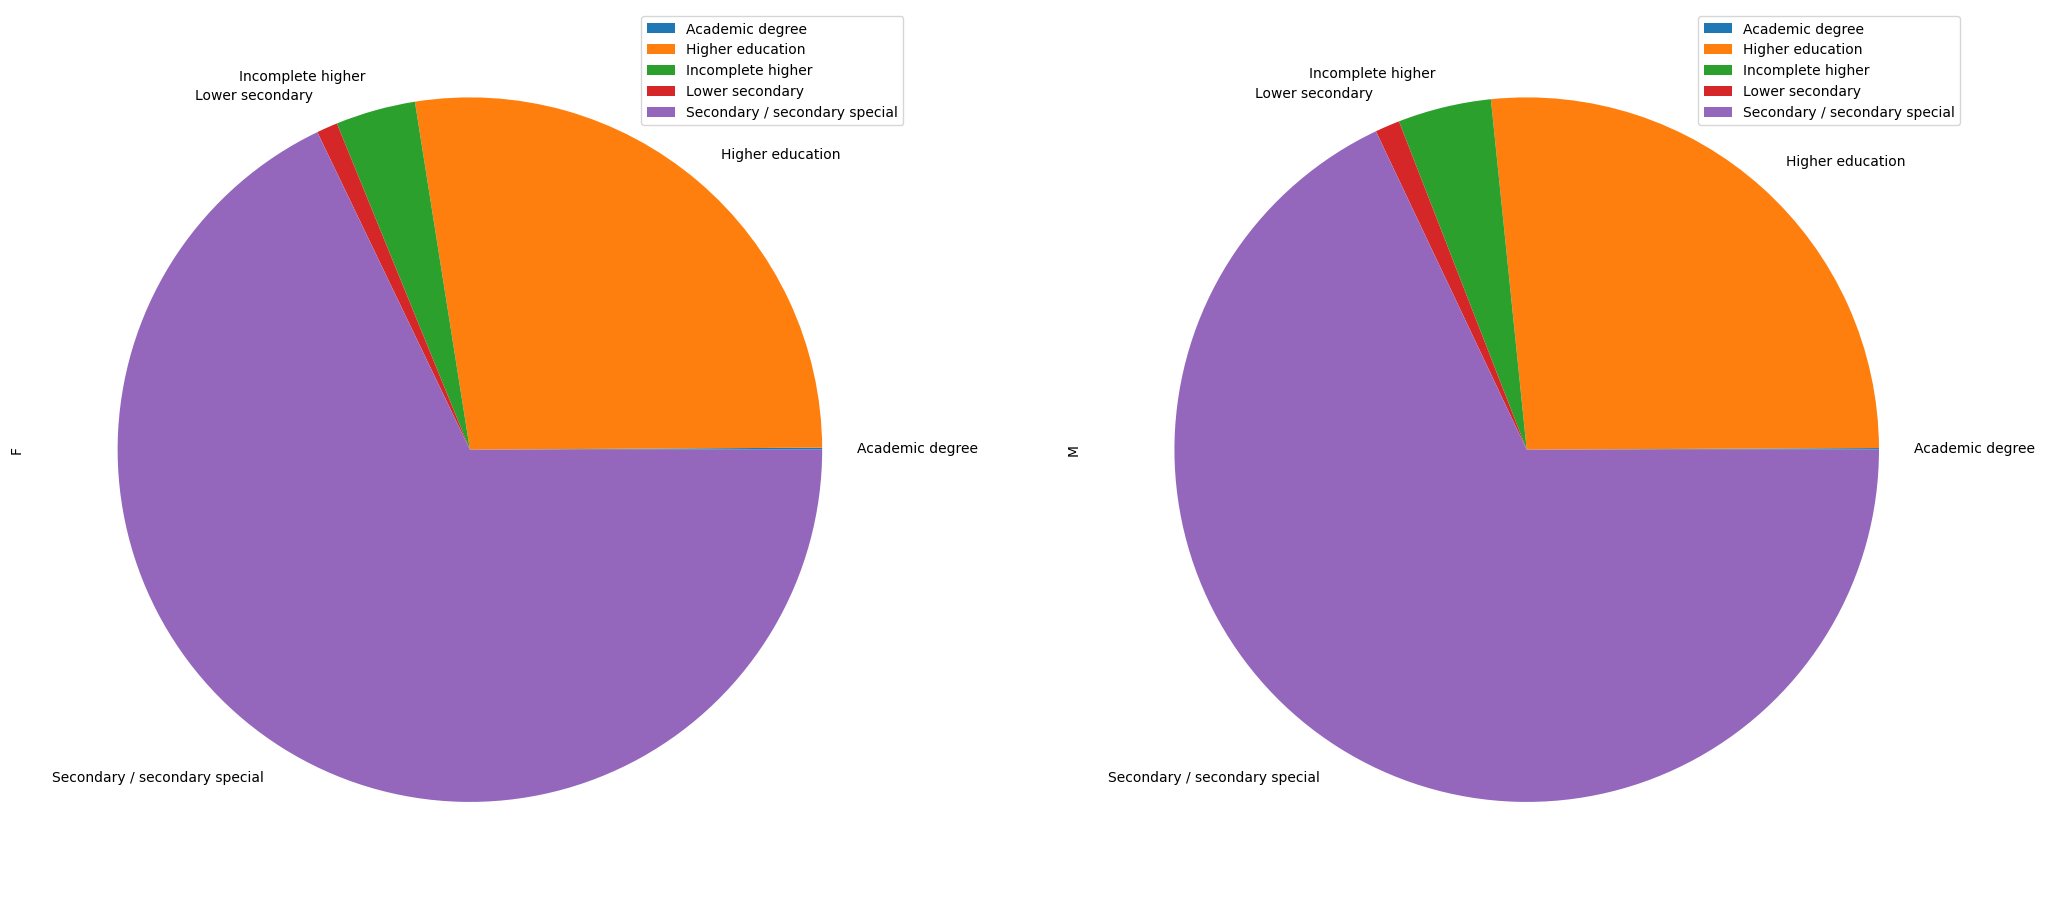

In [17]:
pd.crosstab(df.EDUCATION,df.Gender).plot(kind='pie',subplots=True,figsize=(25,25))
plt.show()

In [18]:
df.groupby("Gender").Annual_income.describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,19549.0,172914.010512,94473.345358,27000.0,112500.0,157500.0,202500.0,1575000.0
M,9616.0,215303.878640,108824.440328,30150.0,135000.0,202500.0,261000.0,1350000.0


# One-hot Encoding / Data Preprocessing:

Prepare the data for model training by handling missing values, encoding categorical variables,
and scaling or normalizing features as needed.

In [19]:
import pandas as pd

# Selecting categorical columns
cat_columns = ['Gender', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'High_risk']

# Applying one-hot encoding
df_encoded = pd.get_dummies(df, columns=cat_columns)

# Displaying the first few rows of the encoded DataFrame
print(df_encoded.head())


        ID  CHILDREN  Annual_income  Birthday_count  Employed_days  \
0  5037048         0       135000.0          -16271          -3111   
1  5044630         1       135000.0          -10130          -1651   
2  5079079         2       180000.0          -12821          -5657   
3  5112872         0       360000.0          -20929          -2046   
4  5105858         0       270000.0          -16207           -515   

   Mobile_phone  Work_Phone  Phone  EMAIL_ID  Family_Members  ...  \
0             1           0      0         0             2.0  ...   
1             1           0      0         0             2.0  ...   
2             1           0      0         0             4.0  ...   
3             1           0      0         1             1.0  ...   
4             1           0      1         0             1.0  ...   

   Marital_status_Single / not married  Marital_status_Widow  \
0                                False                 False   
1                                 Tr

# Machine Learning Model Development:
    
Train various machine learning models for classification, such as logistic regression, decision
trees, random forests, and Boosting Algorithms. Experiment with different algorithms to find the
best-performing model.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [21]:
df_encoded.columns

Index(['ID', 'CHILDREN', 'Annual_income', 'Birthday_count', 'Employed_days',
       'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members',
       'Account_age', 'Gender_F', 'Gender_M', 'Car_Owner_N', 'Car_Owner_Y',
       'Propert_Owner_N', 'Propert_Owner_Y',
       'Type_Income_Commercial associate', 'Type_Income_Pensioner',
       'Type_Income_State servant', 'Type_Income_Student',
       'Type_Income_Working', 'EDUCATION_Academic degree',
       'EDUCATION_Higher education', 'EDUCATION_Incomplete higher',
       'EDUCATION_Lower secondary', 'EDUCATION_Secondary / secondary special',
       'Marital_status_Civil marriage', 'Marital_status_Married',
       'Marital_status_Separated', 'Marital_status_Single / not married',
       'Marital_status_Widow', 'Housing_type_Co-op apartment',
       'Housing_type_House / apartment', 'Housing_type_Municipal apartment',
       'Housing_type_Office apartment', 'Housing_type_Rented apartment',
       'Housing_type_With parents', 'Hig

In [22]:
from sklearn.model_selection import train_test_split

# Assuming df_encoded is your DataFrame with features and target variable
X = df_encoded.drop('High_risk_0', axis=1)  # Features
y = df_encoded['High_risk_0']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the first few rows of the training set
print("X_train:")
print(X_train.head())

# Displaying the first few rows of the testing set
print("\nX_test:")
print(X_test.head())


X_train:
           ID  CHILDREN  Annual_income  Birthday_count  Employed_days  \
1131  5024345         0       585000.0          -16653          -1646   
2265  5044701         0       171000.0           -9937           -129   
5306  5143303         0       382500.0          -16514          -5187   
373   5009581         0       112500.0          -21316         365243   
4528  5066447         2       225000.0          -11268          -1741   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID  Family_Members  ...  \
1131             1           0      0         0             2.0  ...   
2265             1           1      1         0             1.0  ...   
5306             1           0      0         0             1.0  ...   
373              1           0      0         0             2.0  ...   
4528             1           0      0         1             4.0  ...   

      Marital_status_Separated  Marital_status_Single / not married  \
1131                     False                  

In [23]:
 # Feature Scaling (if necessary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


# Model Evaluation:
    
Assess the performance of your models using appropriate evaluation metrics like accuracy,
precision, recall, F1-score, confusion matrix, and ROC AUC. Identify the model that provides the
most accurate predictions of credit card approval.

In [24]:
from sklearn.metrics import confusion_matrix

# Creating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[  86    0]
 [   0 5747]]


In [25]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print("Precision:", precision)


Precision: 1.0


In [26]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print("Recall:", recall)


Recall: 1.0


In [27]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)


F1-score: 1.0


In [28]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00        86
        True       1.00      1.00      1.00      5747

    accuracy                           1.00      5833
   macro avg       1.00      1.00      1.00      5833
weighted avg       1.00      1.00      1.00      5833



# ROC Curve: 

Plotting the Receiver Operating Characteristic (ROC) curve can help you visualize the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) of the classifier across different threshold values.¶

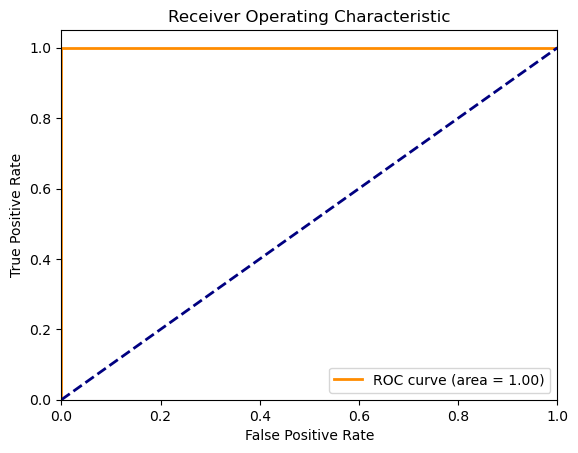

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix Heatmap: 
    
Visualizing the confusion matrix as a heatmap can help you understand the distribution of predicted and actual values.

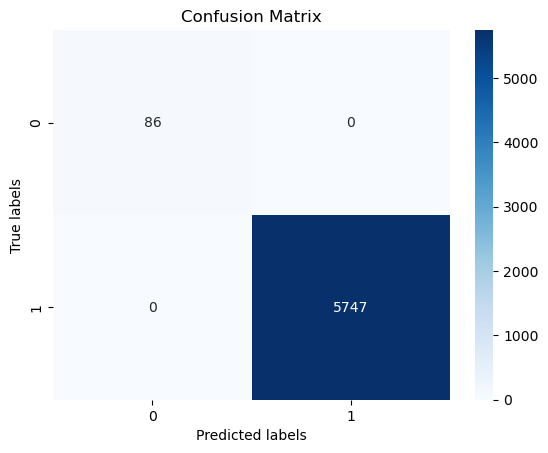

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Precision-Recall Curve: 
    
Plotting the precision-recall curve can help you visualize the trade-off between precision and recall for different threshold values.¶

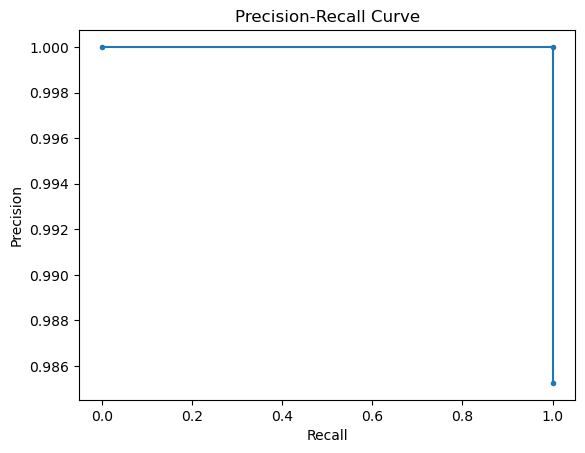

In [31]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Predicting Credit Card Approval:
    
Once your model is built and validated, use it to predict the approval of credit cards using the
test dataset. Understand the importance of feature importance scores in interpreting the
model's predictions.

In [32]:
import pandas as pd


df1 = pd.read_csv('test_data.csv')

In [33]:
df1

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,Managers,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,Laborers,2.0,-48.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,5115415,F,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-21724,-1351,1,0,0,0,NaN,2.0,-22.0,0
7288,5068826,F,Y,Y,0,157500.0,Working,Higher education,Married,House / apartment,-14976,-3550,1,0,0,1,Drivers,2.0,-42.0,0
7289,5026088,F,N,Y,0,67500.0,Working,Secondary / secondary special,Widow,House / apartment,-20482,-5030,1,1,1,0,NaN,1.0,-25.0,0
7290,5142701,F,Y,N,0,95850.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18931,-6678,1,1,0,0,Laborers,2.0,-49.0,0


# Feature Engineering (Renaming the columns)

In [34]:
df1 = df1.rename(columns = {'Has a car':'Car_Owner', 'Has a property':'Propert_Owner', 'Children count':'CHILDREN', 'Income':'Annual_income', 'Employment status':'Type_Income', 'Education level':'EDUCATION', 'Marital status':'Marital_status', 'Dwelling':'Housing_type', 'Age':'Birthday_count', 'Employment length':'Employed_days', 'Has a mobile phone':'Mobile_phone', 'Has a work phone':'Work_Phone', 'Has a phone':'Phone', 'Has an email':'EMAIL_ID', 'Job title':'Type_Occupation', 'Family member count':'Family_Members', 'Account age':'Account_age', 'Is high risk':'High_risk'})

In [35]:
df1

,ID,Gender,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Account_age,High_risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,Managers,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,Laborers,2.0,-48.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,5115415,F,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-21724,-1351,1,0,0,0,NaN,2.0,-22.0,0
7288,5068826,F,Y,Y,0,157500.0,Working,Higher education,Married,House / apartment,-14976,-3550,1,0,0,1,Drivers,2.0,-42.0,0
7289,5026088,F,N,Y,0,67500.0,Working,Secondary / secondary special,Widow,House / apartment,-20482,-5030,1,1,1,0,NaN,1.0,-25.0,0
7290,5142701,F,Y,N,0,95850.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18931,-6678,1,1,0,0,Laborers,2.0,-49.0,0


# DATA CLEANING (Preprocessing)

In [36]:
df1.isna().sum()

ID                    0
Gender                0
Car_Owner             0
Propert_Owner         0
CHILDREN              0
Annual_income         0
Type_Income           0
EDUCATION             0
Marital_status        0
Housing_type          0
Birthday_count        0
Employed_days         0
Mobile_phone          0
Work_Phone            0
Phone                 0
EMAIL_ID              0
Type_Occupation    2296
Family_Members        0
Account_age           0
High_risk             0
dtype: int64

In [37]:
df1.drop(['Type_Occupation'],axis=1,inplace = True)

In [38]:
df1

,ID,Gender,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,Account_age,High_risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,2.0,-48.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,5115415,F,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-21724,-1351,1,0,0,0,2.0,-22.0,0
7288,5068826,F,Y,Y,0,157500.0,Working,Higher education,Married,House / apartment,-14976,-3550,1,0,0,1,2.0,-42.0,0
7289,5026088,F,N,Y,0,67500.0,Working,Secondary / secondary special,Widow,House / apartment,-20482,-5030,1,1,1,0,1.0,-25.0,0
7290,5142701,F,Y,N,0,95850.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18931,-6678,1,1,0,0,2.0,-49.0,0


In [117]:
df1

,ID,Gender,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,Account_age,High_risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,2.0,-48.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,5115415,F,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-21724,-1351,1,0,0,0,2.0,-22.0,0
7288,5068826,F,Y,Y,0,157500.0,Working,Higher education,Married,House / apartment,-14976,-3550,1,0,0,1,2.0,-42.0,0
7289,5026088,F,N,Y,0,67500.0,Working,Secondary / secondary special,Widow,House / apartment,-20482,-5030,1,1,1,0,1.0,-25.0,0
7290,5142701,F,Y,N,0,95850.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18931,-6678,1,1,0,0,2.0,-49.0,0


In [39]:
df1.isna().sum()

ID                0
Gender            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Housing_type      0
Birthday_count    0
Employed_days     0
Mobile_phone      0
Work_Phone        0
Phone             0
EMAIL_ID          0
Family_Members    0
Account_age       0
High_risk         0
dtype: int64

In [40]:
# Selecting categorical columns
cat_columns = ['Gender', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'High_risk']

# Applying one-hot encoding
df1_encoded = pd.get_dummies(df1, columns=cat_columns)

# Displaying the first few rows of the encoded DataFrame
print(df1_encoded.head())

        ID  CHILDREN  Annual_income  Birthday_count  Employed_days  \
0  5091261         0       202500.0          -16834          -1692   
1  5096963         0       675000.0          -18126           -948   
2  5087880         0       234000.0          -21967          -5215   
3  5021949         0       445500.0          -12477           -456   
4  5105705         0       225000.0          -12155           -667   

   Mobile_phone  Work_Phone  Phone  EMAIL_ID  Family_Members  ...  \
0             1           0      0         0             1.0  ...   
1             1           0      1         0             2.0  ...   
2             1           0      0         1             2.0  ...   
3             1           0      0         0             2.0  ...   
4             1           0      0         0             2.0  ...   

   Marital_status_Single / not married  Marital_status_Widow  \
0                                False                 False   
1                                Fal

In [41]:
df1_encoded.columns

Index(['ID', 'CHILDREN', 'Annual_income', 'Birthday_count', 'Employed_days',
       'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members',
       'Account_age', 'Gender_F', 'Gender_M', 'Car_Owner_N', 'Car_Owner_Y',
       'Propert_Owner_N', 'Propert_Owner_Y',
       'Type_Income_Commercial associate', 'Type_Income_Pensioner',
       'Type_Income_State servant', 'Type_Income_Student',
       'Type_Income_Working', 'EDUCATION_Academic degree',
       'EDUCATION_Higher education', 'EDUCATION_Incomplete higher',
       'EDUCATION_Lower secondary', 'EDUCATION_Secondary / secondary special',
       'Marital_status_Civil marriage', 'Marital_status_Married',
       'Marital_status_Separated', 'Marital_status_Single / not married',
       'Marital_status_Widow', 'Housing_type_Co-op apartment',
       'Housing_type_House / apartment', 'Housing_type_Municipal apartment',
       'Housing_type_Office apartment', 'Housing_type_Rented apartment',
       'Housing_type_With parents', 'Hig

In [42]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1_encoded, df1_encoded['High_risk_0'], test_size=0.2, random_state=42)

# Displaying the first few rows of the training set
print("X_train:")
print(X_train.head())

# Displaying the first few rows of the testing set
print("\nX_test:")
print(X_test.head())


X_train:
           ID  CHILDREN  Annual_income  Birthday_count  Employed_days  \
2492  5025819         0       202500.0          -21304         365243   
4490  5087648         0       135000.0          -24580         365243   
2885  5050973         1       112500.0          -15964          -7591   
325   5037058         0       135000.0          -21790         365243   
2215  5044588         2       450000.0          -11870           -221   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID  Family_Members  ...  \
2492             1           0      0         0             1.0  ...   
4490             1           0      0         0             1.0  ...   
2885             1           0      0         0             2.0  ...   
325              1           0      0         0             1.0  ...   
2215             1           0      0         0             4.0  ...   

      Marital_status_Single / not married  Marital_status_Widow  \
2492                                 True           

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Feature Scaling (if necessary)
# Training the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9787525702535984


In [44]:
from sklearn.preprocessing import StandardScaler

# Recreate the StandardScaler object
scaler = StandardScaler()


In [45]:
# Fit the StandardScaler to the test data
X_test_scaled = scaler.fit_transform(df1_encoded)


In [46]:
# Make predictions
y_pred_test = model.predict(X_test_scaled)

# Display the predicted results
print("Predicted Approval Status:")
print(y_pred_test)


Predicted Approval Status:
[ True  True  True ...  True  True False]


C:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# CONCLUSION:
    
### The model has made predictions on the test dataset, and the output shows the predicted approval status for each sample.Each True or False value represents the model's prediction for whether an applicant will be approved for a credit card based on the features in the test dataset. A True value typically means the model predicts approval, while a False value indicates the model predicts rejection.
